## Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

__Variables Description__ <br>
* Pregnancies Number of times pregnant
* Glucose Plasma glucose concentration in an oral glucose tolerance test
* BloodPressure Diastolic blood pressure (mm Hg)
* SkinThickness Triceps skinfold thickness (mm)
* Insulin Two hour serum insulin
* BMI Body Mass Index
* DiabetesPedigreeFunction Diabetes pedigree function
* Age Age in years
* Outcome Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

In [55]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer
from matplotlib.lines import Line2D

In [4]:
# Load dataset
df = pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

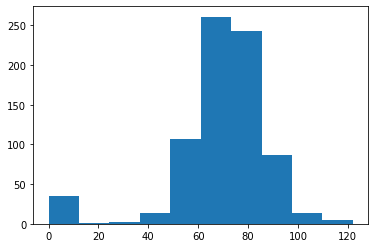

In [6]:
plt.hist(df.BloodPressure)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Pregancies

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

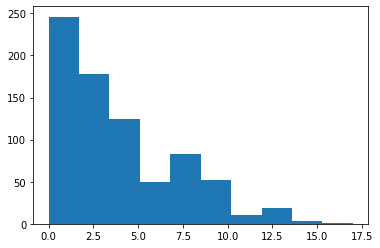

In [8]:
plt.hist(df.Pregnancies)

Majority of women haven't had babies or have had less than 2

### Glucose

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

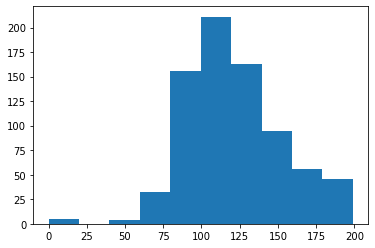

In [9]:
plt.hist(df.Glucose)

In [10]:
# Possible missing values having 0 for glucose
print(len(df.loc[(df.Glucose == 0)]))
df.loc[(df.Glucose == 0)]

5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Only 5 missing values, we can impute these with the average

In [11]:
avg_glucose = df[df.Glucose != 0]['Glucose'].mean()
df['Glucose'] = df['Glucose'].replace(0, avg_glucose)

len(df.loc[(df.Glucose == 0)])

0

### Blood Pressure

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

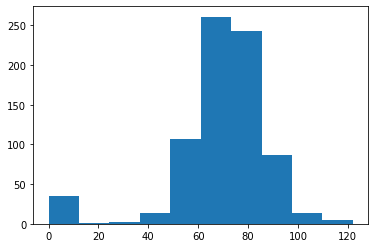

In [12]:
plt.hist(df.BloodPressure)

In [13]:
df.loc[(df.BloodPressure == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


In [14]:
len(df.loc[(df.BloodPressure == 0)]) / len(df)

0.045572916666666664

Less than 5% of the data has missing blood pressure values, therefore we can omit the data if necessary or impute the missing values

(array([  3.,   2.,  35., 125., 240., 226., 107.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <BarContainer object of 10 artists>)

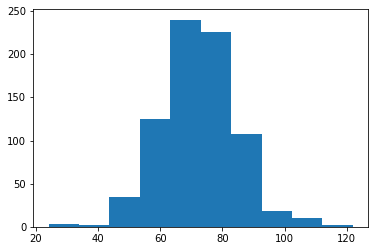

In [15]:
df.BloodPressure.replace(0, np.nan, inplace=True)

# Create an IterativeImputer instance
bpImpute = IterativeImputer()

# Perform MICE imputation
bp_imputed = bpImpute.fit_transform(df)

# Convert the imputed numpy array back to a DataFrame
df2 = pd.DataFrame(bp_imputed, columns=df.columns)

plt.hist(df2.BloodPressure)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


### Skin Thickness

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

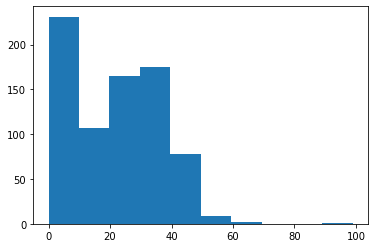

In [17]:
plt.hist(df2.SkinThickness)

### Insulin

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

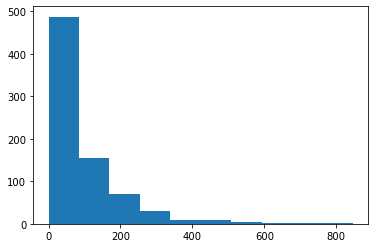

In [18]:
plt.hist(df2.Insulin)

### BMI

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

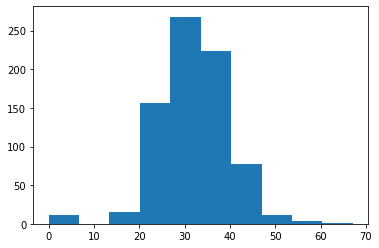

In [19]:
plt.hist(df2.BMI)

Again, we have 0 values which are null, let's perform Iterative Imputing again

(array([ 52., 167., 200., 194.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <BarContainer object of 10 artists>)

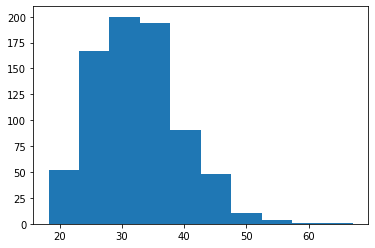

In [20]:
df2.BMI.replace(0, np.nan, inplace=True)

# Create an IterativeImputer instance
bmiImpute = IterativeImputer()

# Perform MICE imputation
bmi_imputed = bmiImpute.fit_transform(df2)

# Convert the imputed numpy array back to a DataFrame
df3 = pd.DataFrame(bmi_imputed, columns=df2.columns)

plt.hist(df3.BMI)

### Diabetes Pedigree Function

(array([318., 206., 136.,  58.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <BarContainer object of 10 artists>)

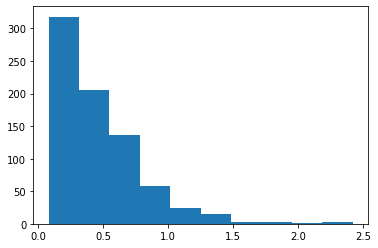

In [21]:
plt.hist(df3.DiabetesPedigreeFunction)

### Age

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

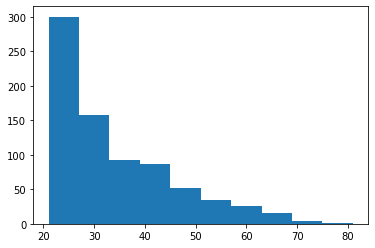

In [22]:
plt.hist(df3.Age)

## Unsupervised ML

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
X = df3.iloc[:, :-1].values
y = df3.iloc[:, -1].values

print(X[:10])
print(y[:10])

[[6.0000000e+00 1.4800000e+02 7.2000000e+01 3.5000000e+01 0.0000000e+00
  3.3600000e+01 6.2700000e-01 5.0000000e+01]
 [1.0000000e+00 8.5000000e+01 6.6000000e+01 2.9000000e+01 0.0000000e+00
  2.6600000e+01 3.5100000e-01 3.1000000e+01]
 [8.0000000e+00 1.8300000e+02 6.4000000e+01 0.0000000e+00 0.0000000e+00
  2.3300000e+01 6.7200000e-01 3.2000000e+01]
 [1.0000000e+00 8.9000000e+01 6.6000000e+01 2.3000000e+01 9.4000000e+01
  2.8100000e+01 1.6700000e-01 2.1000000e+01]
 [0.0000000e+00 1.3700000e+02 4.0000000e+01 3.5000000e+01 1.6800000e+02
  4.3100000e+01 2.2880000e+00 3.3000000e+01]
 [5.0000000e+00 1.1600000e+02 7.4000000e+01 0.0000000e+00 0.0000000e+00
  2.5600000e+01 2.0100000e-01 3.0000000e+01]
 [3.0000000e+00 7.8000000e+01 5.0000000e+01 3.2000000e+01 8.8000000e+01
  3.1000000e+01 2.4800000e-01 2.6000000e+01]
 [1.0000000e+01 1.1500000e+02 7.3819893e+01 0.0000000e+00 0.0000000e+00
  3.5300000e+01 1.3400000e-01 2.9000000e+01]
 [2.0000000e+00 1.9700000e+02 7.0000000e+01 4.5000000e+01 5.4300

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


Since all the variables in X are continuous, we can standardize them all

In [26]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [27]:
scaled_data[:10]

array([[ 0.63994726,  0.86510807, -0.02407255,  0.90726993, -0.69289057,
         0.17454339,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.51483364,  0.53090156, -0.69289057,
        -0.84000058, -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.67842067, -1.28821221, -0.69289057,
        -1.3182856 ,  0.60439732, -0.10558415],
       [-0.84488505, -1.07465235, -0.51483364,  0.15453319,  0.12330164,
        -0.6225983 , -0.92076261, -1.04154944],
       [-1.14185152,  0.50345782, -2.641465  ,  0.90726993,  0.76583594,
         1.55142449,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.18696538,  0.13951448, -1.28821221, -0.69289057,
        -0.98493544, -0.81807858, -0.27575966],
       [-0.25095213, -1.4363026 , -1.82352986,  0.71908574,  0.07120427,
        -0.20228723, -0.676133  , -0.61611067],
       [ 1.82781311, -0.21984267,  0.12478289, -1.28821221, -0.69289057,
         0.42093264, -1.02042653, -0.36084741],
       [-0.54791859,  2.47609554

### PCA

In [28]:
# Create a PCA instance
pca = PCA()

# Fit PCA on the scaled data
pca.fit(scaled_data)

PCA()

In [29]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

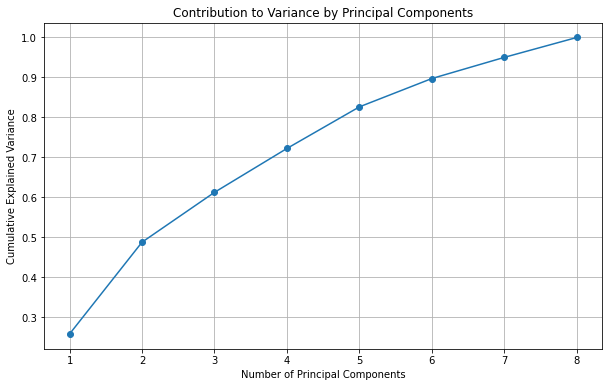

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Contribution to Variance by Principal Components')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

It looks like the first 2 principal components are the most important due to the elbow point

### Clustering

In [31]:
from sklearn.cluster import KMeans

We need to determine the appropriate amount of clusters, so we will calculate the wcss values and determine the elbow point

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

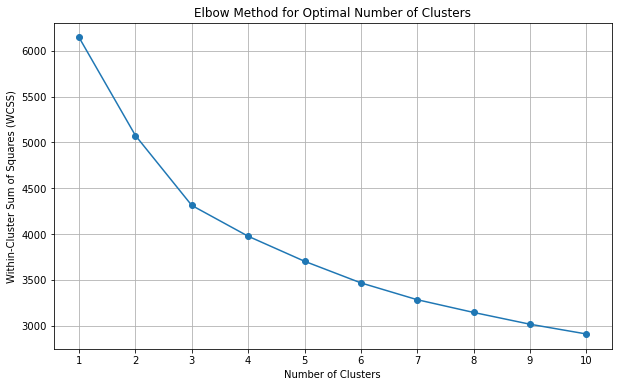

In [32]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS) values
wcss = []

# Loop through a range of cluster numbers
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


It looks like 3 clusters is the best choice, judging from the elbow

In [33]:
# Create a KMeans instance with the desired number of clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans on the scaled data and predict cluster labels
cluster_labels = kmeans.fit_predict(scaled_data)
cluster_centers = kmeans.cluster_centers_

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


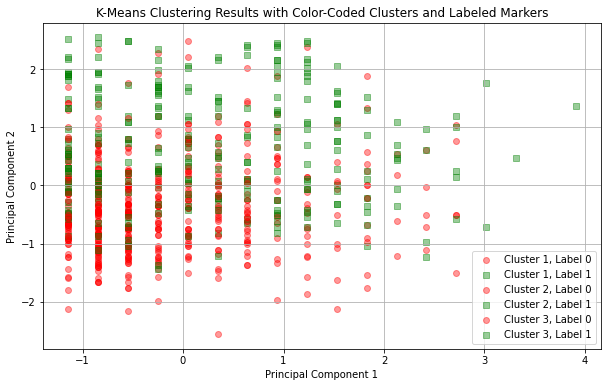

In [38]:
# Define colors and markers for each label
label_colors = ['red', 'green', 'blue']
label_markers = ['o', 's', '^']  # You can adjust these markers based on your preference

# Create a scatterplot
plt.figure(figsize=(10, 6))

# Loop through each cluster and plot points with color-coded clusters and labeled markers
for cluster_num in range(3):  # Since you have 3 clusters
    for label_num in np.unique(y.astype(int)):
        plt.scatter(
            scaled_data[(cluster_labels == cluster_num) & (y == label_num), 0],  # X-axis values (1st principal component)
            scaled_data[(cluster_labels == cluster_num) & (y == label_num), 1],  # Y-axis values (2nd principal component)
            color=label_colors[label_num],
            marker=label_markers[label_num],
            label=f'Cluster {cluster_num + 1}, Label {label_num}',
            alpha=0.4
        )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results with Color-Coded Clusters and Labeled Markers')
plt.legend()
plt.grid()
plt.show()

We can see the 3 distinct clusters based upon the 2 principal components

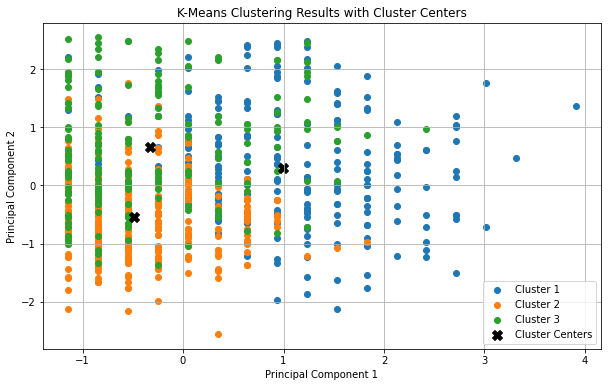

In [40]:
# Create a scatterplot
plt.figure(figsize=(10, 6))

# Loop through each cluster and plot points with color-coded clusters
for cluster_num in range(3):  # Since you have 3 clusters
    plt.scatter(
        scaled_data[cluster_labels == cluster_num, 0],  # X-axis values (1st principal component)
        scaled_data[cluster_labels == cluster_num, 1],  # Y-axis values (2nd principal component)
        label=f'Cluster {cluster_num + 1}'
    )

# Plot cluster centers as X markers
plt.scatter(
    cluster_centers[:, 0],  # X-axis values of cluster centers
    cluster_centers[:, 1],  # Y-axis values of cluster centers
    marker='X',
    color='black',
    s=100,
    label='Cluster Centers'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results with Cluster Centers')
plt.legend()
plt.grid()
plt.show()

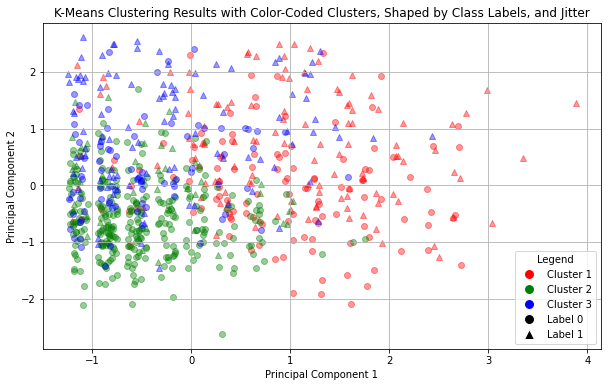

In [61]:

# Define colors for each cluster
cluster_colors = ['red', 'green', 'blue']

# Define markers for each class label in y
label_markers = ['o', '^']  # You can adjust these markers based on your preference

# Create a scatterplot
plt.figure(figsize=(10, 6))

# Jitter amount (adjust as needed)
jitter_amount = 0.1

# Loop through each cluster and plot points with color-coded clusters and shaped by class label
for cluster_num in range(3):  # Since you have 3 clusters
    for label_value in np.unique(y):
        x_jitter = np.random.uniform(-jitter_amount, jitter_amount, size=np.sum((cluster_labels == cluster_num) & (y == label_value)))
        y_jitter = np.random.uniform(-jitter_amount, jitter_amount, size=np.sum((cluster_labels == cluster_num) & (y == label_value)))

        plt.scatter(
            scaled_data[(cluster_labels == cluster_num) & (y == label_value), 0] + x_jitter,
            scaled_data[(cluster_labels == cluster_num) & (y == label_value), 1] + y_jitter,
            color=cluster_colors[cluster_num],
            marker=label_markers[int(label_value)],
            label=f'Cluster {cluster_num + 1}, Label {int(label_value)}',
            alpha=0.4
        )

# Create a combined legend for cluster colors and class labels
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Cluster 1', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Cluster 2', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Cluster 3', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Label 0', markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='^', color='w', label='Label 1', markerfacecolor='black', markersize=10)
]

plt.legend(handles=legend_elements, title='Legend', loc='lower right')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results with Color-Coded Clusters, Shaped by Class Labels, and Jitter')
plt.grid()
plt.show()

We see that there are a lot of patients in Cluster 2 that belong to the non-diabetic group (Label 0) and a lot of patients in Cluster 3 which belong to the diabetic group (Label 1).
Cluster 1 is fairly split, this might tell us that we should use only 2 clusters, let's see what happens when we do that

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


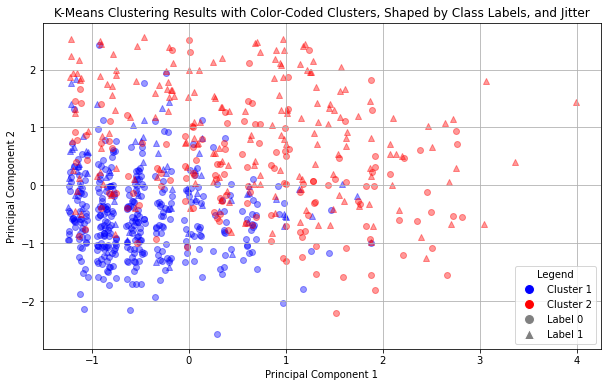

In [64]:
# Fit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
cluster_centers = kmeans.cluster_centers_

# Define colors for each cluster
cluster_colors = ['blue', 'red']

# Define markers for each class label in y
label_markers = ['o', '^']  # You can adjust these markers based on your preference

# Create a scatterplot
plt.figure(figsize=(10, 6))

# Jitter amount (adjust as needed)
jitter_amount = 0.1

# Loop through each cluster and plot points with color-coded clusters and shaped by class label
for cluster_num in range(2):
    for label_value in np.unique(y):
        x_jitter = np.random.uniform(-jitter_amount, jitter_amount, size=np.sum((cluster_labels == cluster_num) & (y == label_value)))
        y_jitter = np.random.uniform(-jitter_amount, jitter_amount, size=np.sum((cluster_labels == cluster_num) & (y == label_value)))

        plt.scatter(
            scaled_data[(cluster_labels == cluster_num) & (y == label_value), 0] + x_jitter,
            scaled_data[(cluster_labels == cluster_num) & (y == label_value), 1] + y_jitter,
            color=cluster_colors[cluster_num],
            marker=label_markers[int(label_value)],
            label=f'Cluster {cluster_num + 1}, Label {int(label_value)}',
            alpha=0.4
        )

# Create a combined legend for cluster colors and class labels
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Cluster 1', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Cluster 2', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Label 0', markerfacecolor='grey', markersize=10),
    Line2D([0], [0], marker='^', color='w', label='Label 1', markerfacecolor='grey', markersize=10)
]

plt.legend(handles=legend_elements, title='Legend', loc='lower right')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results with Color-Coded Clusters, Shaped by Class Labels, and Jitter')
plt.grid()
plt.show()


Now we see that the majority of cluster 1 are non-diabetic patients, while patients in Cluster 2 have a large proportion of diabetic patients.

This tells us that there is clear separation in the data between diabetic and non-diabetic patients

## Supervised ML

In [103]:
X = df3.drop('Outcome', axis=1)
y = df3['Outcome']

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [106]:
print(len(X_train))
print(len(X_test))

614
154


In [107]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.52639686 -1.25828206 -1.41935652 ... -0.97717738 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.32735374  0.80791716 ... -0.59253874  2.41502991
   1.48710085]
 [-0.82846011  0.57032714 -2.14797298 ... -0.52056258  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.69307558  1.13634939 ...  1.91223188  1.981245
   0.44308379]
 [-1.13052335  0.63682202  0.41616098 ...  1.45158441 -0.78487662
  -0.33992901]
 [-1.13052335  0.10486298  1.95742999 ... -1.41306705 -0.61552223
  -1.03594038]]
[[ 0.68185612 -0.7928179  -1.16267627 ...  0.2423848  -0.11637247
   0.87809089]
 [-0.52639686 -0.32735374  0.23316074 ...  0.48710377 -0.954231
  -1.03594038]
 [-0.52639686 -0.4603435  -0.67002791 ... -0.21826267 -0.9245197
  -1.03594038]
 ...
 [ 1.28598261 -0.89256022 -0.01316344 ...  0.64545134  0.04703966
   2.0961108 ]
 [-0.52639686  0.80305922 -0.17737955 ... -0.62132921 -0.39268751
  -0.33992901]
 [ 1.28598261 -1.59075646 -0.17737955 ...  0.42952283  0.70068816
   0.53008521]]


### Logistic Regression

Since our class labels are binary, we can perform logistic regression

In [108]:
from sklearn.linear_model import LogisticRegressionCV

In [110]:
lr_model = LogisticRegressionCV(cv = 10, solver='liblinear')
lr_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr_model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

AttributeError: 'Series' object has no attribute 'reshape'

In [111]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[83 16]
 [19 36]]


0.7727272727272727

Using a default Logistic Regression model we obtain 77% accuracy on our test dataset.<br>Maybe we can remove some features that aren't the most important

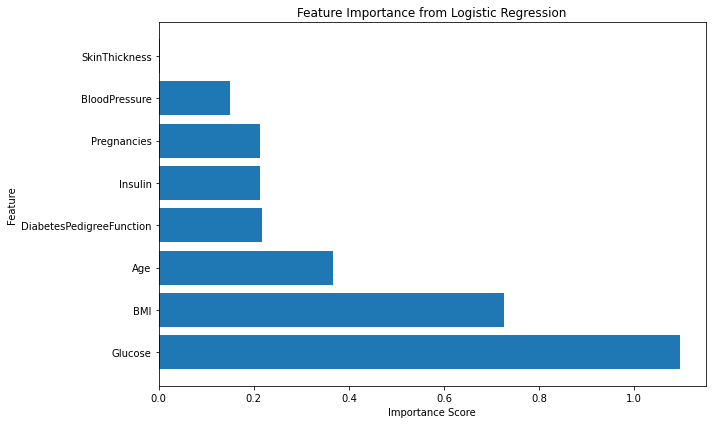

In [112]:
# Extract feature coefficients from the trained model
feature_importance = np.abs(lr_model.coef_[0])

# Create a DataFrame to store the feature names and their importance scores
# Convert the X array to a DataFrame using the original feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importance with custom y-axis labels
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get the current axis
ax.barh(range(len(feature_importance_df)), feature_importance_df['Importance'])
ax.set_yticks(range(len(feature_importance_df)))  # Set the tick positions
ax.set_yticklabels(feature_importance_df['Feature'])  # Set the tick labels
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

We see that glucose is the most important feature, and we again see a great dropoff in importance after BMI and Age.<br>Let's create a new model but containing only these 3 variables

In [128]:
X = df3.drop(columns=['SkinThickness', 'BloodPressure', 'Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.25828206 -0.97717738 -1.03594038]
 [-0.32735374 -0.59253874  1.48710085]
 [ 0.57032714 -0.52056258 -0.94893896]
 ...
 [-0.69307558  1.91223188  0.44308379]
 [ 0.63682202  1.45158441 -0.33992901]
 [ 0.10486298 -1.41306705 -1.03594038]]
[[-7.92817902e-01  2.42384799e-01  8.78090895e-01]
 [-3.27353742e-01  4.87103768e-01 -1.03594038e+00]
 [-4.60343502e-01 -2.18262672e-01 -1.03594038e+00]
 [-4.93590942e-01 -1.11076715e+00  9.50781007e-02]
 [ 4.70584817e-01 -3.47819774e-01  1.48710085e+00]
 [-6.26580702e-01  7.75008438e-01  1.92210795e+00]
 [-1.69049878e+00 -1.71536695e+00 -9.48938958e-01]
 [-1.61116543e-01  2.13594332e-01  9.65092316e-01]
 [ 1.06903874e+00 -1.46286505e-01  3.56082365e-01]
 [ 8.36306657e-01  1.99199099e-01  2.79212217e+00]
 [-3.60601182e-01 -6.93305377e-01  6.17086630e-01]
 [ 1.90022474e+00  2.71175266e-01  2.35711506e+00]
 [ 8.69554097e-01 -2.03867439e-01 -3.39929007e-01]
 [-8.59312782e-01  1.84803865e-01  8.78090895e-01]
 [-1.12529230e+00 -5.63748276e-01 -9.48938958e

In [129]:
lr_model_2 = LogisticRegressionCV(cv = 10, solver = 'liblinear')
lr_model_2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr_model_2.predict(X_test)

In [130]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_2 = confusion_matrix(y_test, y_pred)
print(cm_2)
accuracy_score(y_test, y_pred)

[[80 19]
 [20 35]]


0.7467532467532467

Our accuracy declines by around 2%<br>Let's try using only the 2 most important features and then plotting the logistic regression decision boundaries for the training and test sets

In [133]:
X = df3.drop(columns=['SkinThickness', 'BloodPressure', 'Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome', 'Age'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
lr_model_3 = LogisticRegressionCV(cv = 10, solver = 'liblinear')
lr_model_3.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr_model_3.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84 15]
 [21 34]]


0.7662337662337663

Our accuracy actually improved when we dropped age. Now let's plot the decision boundaries for the training and test sets

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


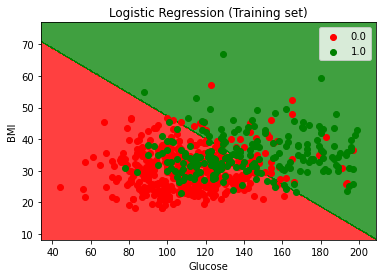

In [137]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, lr_model_3.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


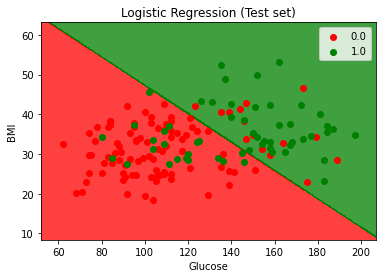

In [139]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, lr_model_3.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

### Support Vector Machine

In [140]:
from sklearn.svm import SVC

In [143]:
svm = SVC()
svm.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85 14]
 [22 33]]


0.7662337662337663

Our SVM classifier demonstrates similar accuracy as our logistic regression classifier

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


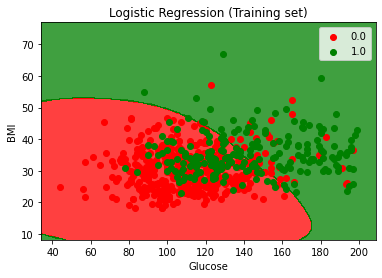

In [144]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, svm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


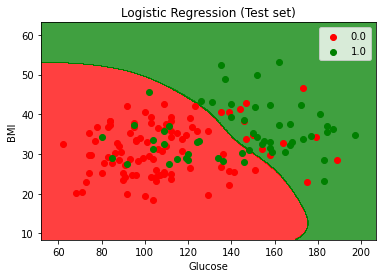

In [145]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, svm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

We can try tweaking the hyperparameters for our classifier and replotting the decision boundaries.<br>Perhaps implementing grid search for best params

In [156]:
svm_2 = SVC(C=100, gamma=.01)
svm_2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svm_2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88 11]
 [24 31]]


0.7727272727272727

By adjusting our gamma parameter, we achieve a slight increase, 1%, in accuracy

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


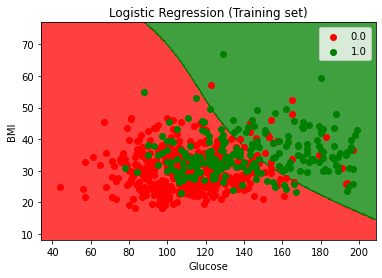

In [157]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, svm_2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Classifier (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


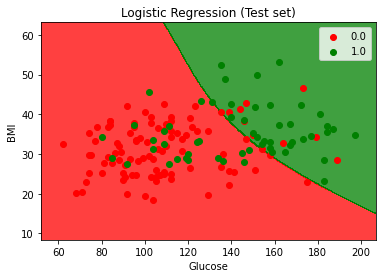

In [158]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, svm_2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Classifier (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

We can plot these results for our training and test sets side by side to analyze the decision boundaries and how it might be improved

### Random Forests

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[82 17]
 [23 32]]


0.7402597402597403

We get slightly worse results with our initial random forest classifier. We can adjust the hyperparameters

In [161]:
rf_2 = RandomForestClassifier(n_estimators=200, max_depth=2)
rf_2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[86 13]
 [22 33]]


0.7727272727272727

After adjusting our maximum depth we achieve similar results to the SVM and Logistic regression models. Let's plot the decision boundary for our random forest

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


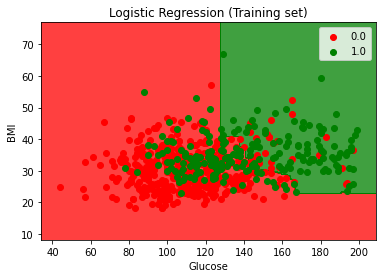

In [162]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, rf_2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


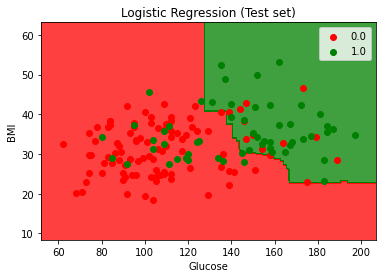

In [163]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, rf_2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

It might be best to include more features in our model. It seems like we will not be able to break past 80% accuracy with the current features in our model.

In [185]:
X = df.drop(columns=['SkinThickness', 'BloodPressure', 'Pregnancies', 'Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

"""#Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)"""

'#Scale data\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

In [186]:
X_train.shape

(614, 5)

We now have 5 features in our model

In [187]:
rf_3 = RandomForestClassifier(n_estimators=200, max_depth=2)
rf_3.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_3.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[90  9]
 [25 30]]


0.7792207792207793

We have achieved one more correct prediction, but let's implement gridsearch cross validation to find the best hyperparameters

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'max_depth': [None, 2, 5, 10, 20],                 # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']     # Number of features to consider when looking for the best split
}

# Create the GridSearchCV object with your Random Forest model and the parameter grid
grid_search = GridSearchCV(rf_3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.7866719978675196


Let's tweak the hyperparameter grid based on the results

In [190]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 250],            # Number of trees in the forest
    'max_depth': [5, 10, 15],                 # Maximum depth of the tree
    'min_samples_split': [10, 20, 30],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 5, 10],               # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']     # Number of features to consider when looking for the best split
}

# Create the GridSearchCV object with your Random Forest model and the parameter grid
grid_search = GridSearchCV(rf_3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 30, 'n_estimators': 50}
Best Score: 0.7915767026522723


It seems like we aren't able to increase the accuracy past this stage. Let's build our tree with the features producing the best accuracy and determine the feature significance

In [191]:
best_params = grid_search.best_params_

# Create a new Random Forest model using the best parameters
rf_4 = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42  # Set a random seed for reproducibility
)

# Train the new Random Forest model on your training data
rf_4.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_4.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[79 20]
 [18 37]]


0.7532467532467533

Maybe random forest isn't the best model

In [192]:
X_train = pd.DataFrame(X_train)

In [193]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_4.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)


                    Feature  Importance
0                   Glucose    0.420483
4                       Age    0.203036
2                       BMI    0.202883
3  DiabetesPedigreeFunction    0.103367
1                   Insulin    0.070232


We find low importance scores for DPF and Insulin. Let's remove these features

In [194]:
X = df.drop(columns=['SkinThickness', 'BloodPressure', 'Pregnancies', 'Outcome', 'DiabetesPedigreeFunction', 'Insulin'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [195]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 250],            # Number of trees in the forest
    'max_depth': [5, 10, 15],                 # Maximum depth of the tree
    'min_samples_split': [10, 20, 30],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 5, 10],               # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']     # Number of features to consider when looking for the best split
}

# Create the GridSearchCV object with your Random Forest model and the parameter grid
grid_search = GridSearchCV(rf_3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 150}
Best Score: 0.7834199653471945


In [196]:
best_params = grid_search.best_params_

# Create a new Random Forest model using the best parameters
rf_4 = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42  # Set a random seed for reproducibility
)

# Train the new Random Forest model on your training data
rf_4.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_4.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[83 16]
 [19 36]]


0.7727272727272727

This is the most balanced result we have achieved with any model, similar number of false positives and negatives.<br>We will input all features and see the results

In [199]:
X = df3.drop(columns=['SkinThickness', 'Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [200]:
rf_5 = RandomForestClassifier(n_estimators=200, max_depth=2)
rf_5.fit(X_train, y_train)

y_pred = rf_5.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[93  6]
 [27 28]]


0.7857142857142857

In [201]:
# GridSeachCV
param_grid = {
    'n_estimators': [50, 100, 150, 250],            # Number of trees in the forest
    'max_depth': [5, 10, 15],                 # Maximum depth of the tree
    'min_samples_split': [10, 20, 30],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 5, 10],               # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']     # Number of features to consider when looking for the best split
}

# Create the GridSearchCV object with your Random Forest model and the parameter grid
grid_search = GridSearchCV(rf_5, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Best Score: 0.7866586698653871


/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [202]:
best_params = grid_search.best_params_

# Create a new Random Forest model using the best parameters
rf_5 = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42  # Set a random seed for reproducibility
)

# Train the new Random Forest model on your training data
rf_5.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_5.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[79 20]
 [18 37]]


/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7532467532467533

In [208]:
# try with the 2 variables BMI and Glucose
X = df3.drop(columns=['SkinThickness', 'BloodPressure', 'Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome', 'Age'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [209]:
rf_6 = RandomForestClassifier()

# Grid search
param_grid = {
    'n_estimators': [50, 100, 150, 250],            # Number of trees in the forest
    'max_depth': [5, 10, 15],                 # Maximum depth of the tree
    'min_samples_split': [10, 20, 30],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 5, 10],               # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']     # Number of features to consider when looking for the best split
}

# Create the GridSearchCV object with your Random Forest model and the parameter grid
grid_search = GridSearchCV(rf_6, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 150}
Best Score: 0.7818072770891644


In [210]:
best_params = grid_search.best_params_

# Create a new Random Forest model using the best parameters
rf_6 = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42  # Set a random seed for reproducibility
)

# Train the new Random Forest model on your training data
rf_6.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_6.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85 14]
 [22 33]]


0.7662337662337663

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


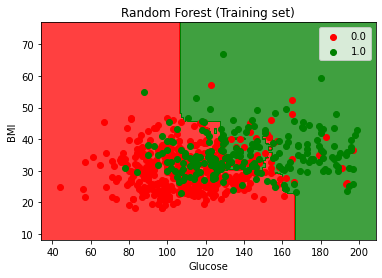

In [211]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, rf_6.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


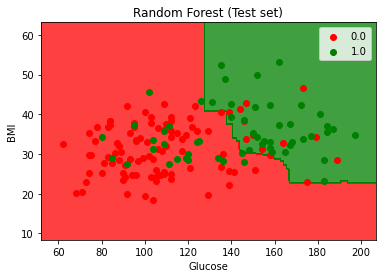

In [212]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, rf_2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()